### Import Dependencies 

In [220]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import psycopg2
from sqlalchemy import create_engine
from databaseconfig import db_string
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [163]:
engine = create_engine(db_string)
conn = engine.connect()

In [164]:
# Query All Records in the the Database
departments = pd.read_sql("SELECT * FROM Departments", conn)
dept_manager = pd.read_sql("SELECT * FROM dept_manager", conn)
dept_emp = pd.read_sql("SELECT * FROM dept_emp", conn)
employees = pd.read_sql("SELECT * FROM employees", conn)
salaries = pd.read_sql("SELECT * FROM salaries", conn)
titles = pd.read_sql("SELECT * FROM titles", conn)

In [165]:
# Close the engine and connection
conn.close()
engine.dispose()

In [166]:
salaries.head()

,emp_no,salary,from_date,to_date
0,10001,60117,1986-06-26,1987-06-26
1,10002,65828,1996-08-03,1997-08-03
2,10003,40006,1995-12-03,1996-12-02
3,10004,40054,1986-12-01,1987-12-01
4,10005,78228,1989-09-12,1990-09-12


#### Visualize the most common salary ranges for employees by a histogram.

In [237]:
# Check for null values within salaries, titles tables
salaries.isnull().sum().sum()
titles.isnull().sum().sum()

0

0

Text(0.5, 0, 'Salary')

Text(0, 0.5, 'Frequency')

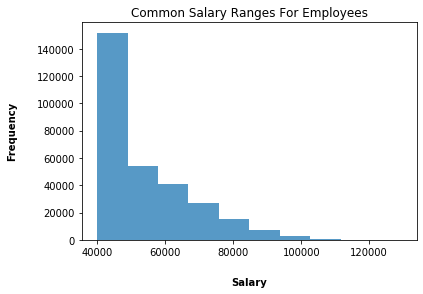

In [286]:
ax = salaries['salary'].plot.hist(bins=10, alpha=0.75, title= "Common Salary Ranges For Employees")
ax.set_xlabel("Salary", labelpad=20, weight='bold', size=10)
ax.set_ylabel("Frequency", labelpad=20, weight='bold', size=10)

In [140]:
titles.columns
salaries.columns
titles.count()
salaries.count()

Index(['emp_no', 'title', 'from_date', 'to_date'], dtype='object')

Index(['emp_no', 'salary', 'from_date', 'to_date'], dtype='object')

emp_no       443308
title        443308
from_date    443308
to_date      443308
dtype: int64

emp_no       300024
salary       300024
from_date    300024
to_date      300024
dtype: int64

#### Bar chart of average salary by title.

In [252]:
# add to readme file 
new= pd.merge(salaries, titles, how='left', on='emp_no')
new1= new.drop(['emp_no', 'from_date_x', 'to_date_x', 'from_date_y', 'to_date_y'], axis = 1) 
new1.head()

,salary,title
0,60117,Senior Engineer
1,65828,Staff
2,40006,Senior Engineer
3,40054,Engineer
4,40054,Senior Engineer


In [258]:
new1= new1.groupby('title').mean().reset_index()
new1.rename(columns={'salary': 'Avg salary'}, inplace=True)
new1

,title,Avg salary
0,Assistant Engineer,48493.204786
1,Engineer,48539.781423
2,Manager,51531.041667
3,Senior Engineer,48506.751806
4,Senior Staff,58503.286614
5,Staff,58465.271904
6,Technique Leader,48580.505772


In [260]:
#Create a bar chart of average salary by title.
# cx = df.plot.bar(x='lab', y='val', rot=0)
x_axis= new1['title']
y_axis= new1['Avg salary']

Text(0.5, 0, 'Title')

Text(0, 0.5, 'Salary')

Text(0.5, 1.0, 'Average Salary by Title')

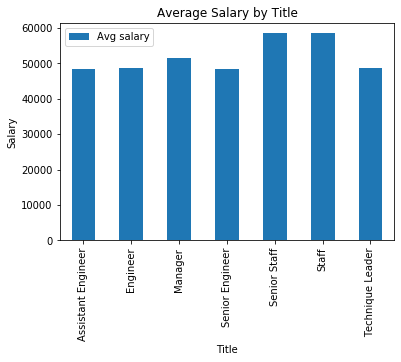

In [287]:
new1.plot(x ='title', y='Avg salary', kind = 'bar')
plt.xlabel("Title")
plt.ylabel("Salary")
plt.title("Average Salary by Title")
plt.show()

In [265]:
# Check the emp_no i.e. ID:
salaries[salaries['emp_no']==499942]
employees[employees['emp_no']==499942]
dept_emp[dept_emp['emp_no']==499942]
titles[titles['emp_no']==499942]

,emp_no,salary,from_date,to_date
299966,499942,40000,1998-03-28,1999-03-28


,emp_no,birth_date,first_name,last_name,gender,hire_date
299966,499942,1963-01-10,April,Foolsday,F,1997-02-10


,emp_no,dept_no,from_date,to_date
331539,499942,d005,1998-03-28,9999-01-01


,emp_no,title,from_date,to_date
443224,499942,Technique Leader,1998-03-28,9999-01-01
